# Python в инженерных расчетах. Лекция 05.
<hr style="border:2px solid gray">

План занятия:

1. Загрузить и визуализировать график силы деформирования, полученный при испытаниях плоского образца на растяжение;
2. Пересчитать график силы деформирования в график инженерных и истинных напряжений и деформаций;
3. Определить предел прочности материала;
4. Определить равномерное удлинение материала;
5. Расчитать модуль Юнга для этой стали по данным эксперимента;
6. Определить условный предел текучести для этой стали;
7. Попробовать апроксимировать кривую сопративления пластической деформации простейшим урвнением.

#### Все расчёты будем производить с использованием библиотеки `NumPy`.

In [198]:
import numpy as np
import matplotlib.pyplot as plt
print('NumPy загружен. Версия:', np.__version__)

NumPy загружен. Версия: 2.2.2


In [199]:
# Размеры образца, которые нам понадобятся позднее
b0 = 20 # ширина образца по ISO 6892-1:2019
L0 = 80 # начальная длина образца по ISO 6892-1:2019
a0 = 1.5 # тольщина образца по исходным данным
A0 = b0*a0 # расчет площади поперечного сечения образца

#### 1. Создание массива NumPy. Первый столбец массива - перемещение, второй столбец - сила.

In [200]:
# Прочитаем данные из нашего файла load_stroke_data.txt
load_stroke_array = np.loadtxt ('../data/load_stroke_data.txt', delimiter='\t')
print(load_stroke_array[:25])

[[0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.42146880e+02]
 [0.00000000e+00 1.43395231e+02]
 [0.00000000e+00 1.45049487e+02]
 [0.00000000e+00 1.46037445e+02]
 [0.00000000e+00 1.47101990e+02]
 [3.03244289e-04 1.48258437e+02]
 [0.00000000e+00 1.49407226e+02]
 [3.03244289e-04 1.50594308e+02]
 [3.03795066e-04 1.51781390e+02]
 [3.03797483e-04 1.52937837e+02]
 [3.03797483e-04 1.54124919e+02]
 [3.03797483e-04 1.55250733e+02]
 [3.03797483e-04 1.56376546e+02]
 [3.03797483e-04 1.58344804e+02]
 [3.03797483e-04 1.59340421e+02]
 [3.03797483e-04 1.61193801e+02]
 [3.03797483e-04 1.63131425e+02]
 [3.03797483e-04 1.64904389e+02]
 [3.03797483e-04 1.66899452e+02]
 [6.07041772e-04 1.67918045e+02]
 [3.03797483e-04 1.68967272e+02]
 [6.07041772e-04 1.70085427e+02]
 [6.07592549e-04 1.71249533e+02]
 [6.07594966e-04 1.72375346e+02]]


#### Есть более сложный вариант, но на его примере давайте изучим создание массива NumPy из одного или нескольких списков. 

In [201]:
stroke = [] # пустой список для записи данных о перемещении
load = [] # пустой список для записи данных о силе

# открываем файл с данными
with open ('../data/load_stroke_data.txt', 'r') as file: # 'r' означает, что файл мы октрываем для чения
    for line in file:                                    # для каждой строки в файле мы выполняем следующие действия
        stroke_load = line.split('\t')                   # разделяем строку по табуляции (можно было ничего не писать в скобках 
                                                         # и разделение было бы по любым пробелам). Получаем временный список из двух чисел
        stroke.append(float(stroke_load[0]))             # первое число добавляем в список stroke
        load.append(float(stroke_load[1]))               # второе число в список load
# Два полученных списка мы объединяем в NumPy array
load_stroke_array = np.array([stroke, load]).T  # .T — транспонируем: строки → столбцы (иначе будет две длинные строки)
print(load_stroke_array[:25])

[[0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.42146880e+02]
 [0.00000000e+00 1.43395231e+02]
 [0.00000000e+00 1.45049487e+02]
 [0.00000000e+00 1.46037445e+02]
 [0.00000000e+00 1.47101990e+02]
 [3.03244289e-04 1.48258437e+02]
 [0.00000000e+00 1.49407226e+02]
 [3.03244289e-04 1.50594308e+02]
 [3.03795066e-04 1.51781390e+02]
 [3.03797483e-04 1.52937837e+02]
 [3.03797483e-04 1.54124919e+02]
 [3.03797483e-04 1.55250733e+02]
 [3.03797483e-04 1.56376546e+02]
 [3.03797483e-04 1.58344804e+02]
 [3.03797483e-04 1.59340421e+02]
 [3.03797483e-04 1.61193801e+02]
 [3.03797483e-04 1.63131425e+02]
 [3.03797483e-04 1.64904389e+02]
 [3.03797483e-04 1.66899452e+02]
 [6.07041772e-04 1.67918045e+02]
 [3.03797483e-04 1.68967272e+02]
 [6.07041772e-04 1.70085427e+02]
 [6.07592549e-04 1.71249533e+02]
 [6.07594966e-04 1.72375346e+02]]


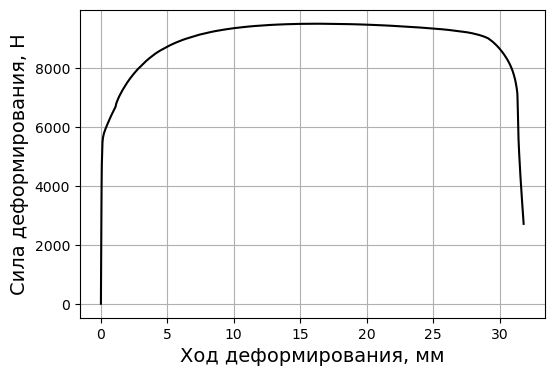

In [202]:
# Визуализируем результаты
# создаем "базу" для графика
plt.figure(figsize=(6, 4))
plt.plot (load_stroke_array[:,0], load_stroke_array[:,1], '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Ход деформирования, мм', fontsize = 14)
plt.ylabel ('Сила деформирования, Н', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

## 2. Векторизованные операции (определение напряжений и деформаций)

NumPy позволяет выполнять операции над всем массивом **без циклов**.

In [203]:
# Пример: расчитаем инженерные и истинные деформации/напряжения:
# сначала создадим нулевой массив равный по размеру массиву с силой и перемещением
stress_strain_eng = np.zeros(load_stroke_array.shape)
# в нулевой столбец запишем инженерную деформацию (формулу смотрите в лекции 002)
stress_strain_eng[:,0] = (load_stroke_array[:,0]/L0)*100
# в первый столбец запишем инженерное напряжение (формулу смотрите в лекции 002)
stress_strain_eng[:,1] = load_stroke_array[:,1]/A0
# аналогично с истинными напряжениями и деформациями
stress_strain_true = np.zeros(load_stroke_array.shape)
stress_strain_true[:,1] = stress_strain_eng[:,1]*(1 + stress_strain_eng[:,0]/100)
stress_strain_true[:,0] = np.log(1 + stress_strain_eng[:,0]/100)

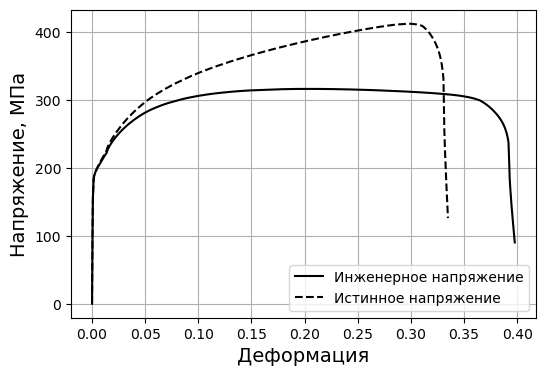

In [204]:
# Визуализируем результаты
# создаем "базу" для графика
plt.figure(figsize=(6, 4))
plt.plot (stress_strain_eng[:,0]/100, stress_strain_eng[:,1], '-', color = 'black', label = 'Инженерное напряжение')
plt.plot (stress_strain_true[:,0], stress_strain_true[:,1], '--', color = 'black', label = 'Истинное напряжение')
# Добавляем названия осей
plt.xlabel ('Деформация', fontsize = 14)
plt.ylabel ('Напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()
plt.legend()

## 3. Определение предела прочности Rm и равномерного удлинения Ag

In [205]:
# Поиск предела прочности
Rm = stress_strain_eng [:, 1].max()
print (f'Предел прочности материала Rm = {Rm:.3f} МПа')

Предел прочности материала Rm = 316.736 МПа


In [206]:
# Определение равномерного удлинения
# для начала определим индекс соответсвующий пределу прочности
ind = np.argmax( stress_strain_eng [:, 1])
Ag = stress_strain_eng [ind, 0] - (Rm/210000)*100
print(f'Равномерное удлинение Ag = {Ag:.3f}, %')

Равномерное удлинение Ag = 20.434, %


## 4. Определение модуля Юнга

In [207]:
# Гарантироанная упругая зона находится из условия: ε < 0.05% → 0.0005
elastic_mask = stress_strain_true [:, 0] <= 0.0005 # elastic_mask - список в котором ячейка = True если ε < 0.5% 
print (elastic_mask)

[ True  True  True ... False False False]


In [208]:
strain_elastic = stress_strain_true[:,0][elastic_mask]
stress_elastic = stress_strain_true[:,1][elastic_mask]
# Расчёт модуля Юнга
numerator = np.sum(stress_elastic * strain_elastic)
denominator = np.sum(strain_elastic ** 2)
Youngs_modulus = numerator / denominator

print(f'Модуль Юнга E = {Youngs_modulus:.0f} МПа')

Модуль Юнга E = 221900 МПа


## 5. Определение условного предела текучести и построение графика сопротивления пластической деформации

In [209]:
# отбросим упругую часть графика
filtr_01 = stress_strain_true [:, 0] - stress_strain_true [:, 1]/Youngs_modulus >= 0.002 
# отбрасываем часть графика, соответсвующую зоне локализации деформации
ind = np.argmax (stress_strain_true [:, 1])
filtr_02 = np.arange(len(stress_strain_true [:, 1])) <= ind
flow_stress_curve = np.array(stress_strain_true[filtr_01 & filtr_02])
# и передвиним график в начало координать по оси деформации
flow_stress_curve[:, 0] = flow_stress_curve[:, 0] - flow_stress_curve[0, 0]
# Предел текучести таким образом:
yield_stress = flow_stress_curve[0, 1]
print (f'Условный предел текучести материала Sigma02 = {yield_stress:.2f}, МПа')

Условный предел текучести материала Sigma02 = 193.46, МПа


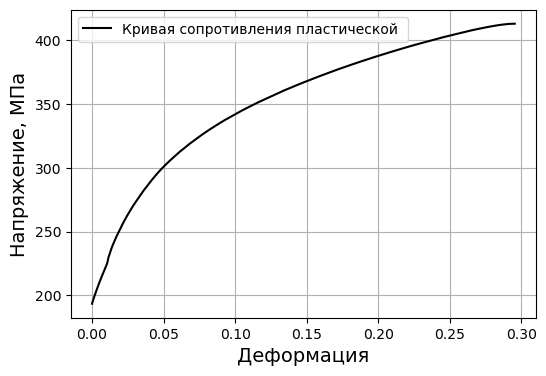

In [210]:
# Визуализируем результаты
# создаем "базу" для графика
plt.figure(figsize=(6, 4))
plt.plot (flow_stress_curve[:,0], flow_stress_curve[:,1], '-', color = 'black', label = 'Кривая сопротивления пластической ')
# Добавляем названия осей
plt.xlabel ('Деформация', fontsize = 14)
plt.ylabel ('Напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()
plt.legend()

## 5. Аппроксимация кривой сопротивления пластической деформации

В пластической области часто используется обобщённая степенная модель:

$$
\sigma_{\text{true}} = \sigma_0 + K \cdot \varepsilon_{\text{true}}^n
$$

где:
- $\sigma_0$ — напряжение течения при начале пластического деформирования (близок к пределу текучести)
- $K$ — коэффициент прочности, МПа
- $n$ — показатель упрочнения

Если значение $\sigma_0$ **известно или задано (в шашем случае пусть это будет условный предел)**, можно прологарифмировать остаток:

$$
\ln(\sigma_{\text{true}} - \sigma_0) = \ln K + n \cdot \ln \varepsilon_{\text{true}}
$$

Тогда задача сводится к линейной регрессии между $\ln \varepsilon_{\text{true}}$ и $\ln(\sigma_{\text{true}} - \sigma_0)$.

In [211]:
# Линейная регрессия: y = a + n*x, где a = ln(K), n = показатель упрочнения
# Логорифмируем левую часть
log_sigma = np.log(flow_stress_curve[1:,1] - yield_stress)
log_epsilon = np.log(flow_stress_curve[1:,0])

# Линейная регрессия: y = a + n*x, где a = ln(K), n = показатель упрочнения
coeffs = np.polyfit(log_epsilon, log_sigma, deg = 1)
n = coeffs[0]        # показатель упрочнения
K = np.exp(coeffs[1])  # K = exp(a)

print(f'Показатель упрочнения (n): {n:.3f}')
print(f'Коэффициент прочности (K): {K:.1f} МПа')

Показатель упрочнения (n): 0.698
Коэффициент прочности (K): 709.6 МПа


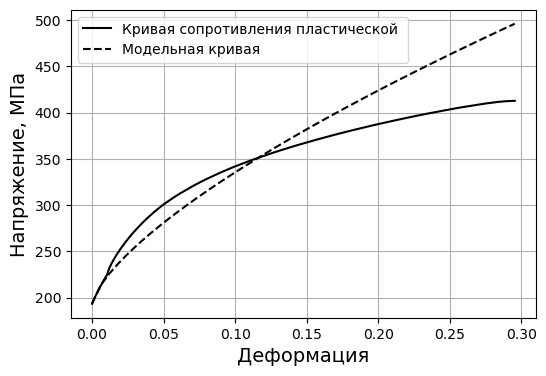

In [212]:
# сравним кривую сопротивления пластической деформации модельную и исходную
strain = np.linspace(0, flow_stress_curve[-1,0])
stress = yield_stress + K*strain**n
# Визуализируем результаты
# создаем "базу" для графика
plt.figure(figsize=(6, 4))
plt.plot (flow_stress_curve[:,0], flow_stress_curve[:,1], '-', color = 'black', label = 'Кривая сопротивления пластической ')
plt.plot (strain, stress, '--', color = 'black', label = 'Модельная кривая')
# Добавляем названия осей
plt.xlabel ('Деформация', fontsize = 14)
plt.ylabel ('Напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()
plt.legend()